In [ ]:
#libraries
import re
import numpy as np
from collections import Counter
import num2words
from nltk import tokenize as tk
import matplotlib.pyplot as plt
import operator
from nltk import word_tokenize
import nltk
from nltk.corpus import stopwords as sw
from textblob import TextBlob
from textblob import Word
from textblob.wordnet import VERB
import json

In [ ]:
def read_file():
    f = open("Test.txt", encoding="utf8")
    
    whole_text = f.read()
    #print("FULL TEXT: ")
    #print(whole_text)
    #print('-' * 30)
    f.close()
    return whole_text

In [ ]:
def number_of_lines():
    f = open("Test.txt", encoding="utf8")
    
    whole_text = f.readlines()
    f.close()
    print("Total # of Lines: "+ str(len(whole_text)))
    print('-' * 30)

In [ ]:
def number_of_characters(whole_text):
    print("Total # of Characters: "+ str(len(whole_text)+1))
    print('-' * 30)
    
    char_freq = Counter(whole_text)
    del char_freq[' ']
    del char_freq['\n']
    
    print("TOP 10 CHARACTERS & FREQUENCIES: - spaces & new lines")
    create_histogram_counter(char_freq, "num_of_char")
    print('-' * 30)

In [ ]:
def frequency_count(whole_text):
    word_by_word = re.sub(r"[,.;@#?!&$:\“\”\(\)\[\]\‘\—]+\ *", " ", whole_text).replace("’s","").split()
    word_by_word_lower = re.sub(r"[,.;@#?!&$:\“\”\(\)\[\]\‘\—]+\ *", " ", whole_text).lower().replace("’s","").split()
    
    print("Total # of Words: "+ str(len(word_by_word)))
    print('-' * 30)
    
    frequency = Counter(word_by_word)
    frequency_lower = Counter(word_by_word_lower)

    print("WORD FREQUENCIES ARE SAVED!")
    print('-' * 30)
    with open('frequency.json', 'w') as f:
        json.dump(frequency, f)
        
    print("WORD FREQUENCIES ARE SAVED  WITHOUT CASE SENSITIVITY!")
    print('-' * 30)
    with open('frequency_lower.json', 'w') as f:
        json.dump(frequency, f)
        
    words = []
    for item in frequency:
        words.append(item)
    
    print("TOP 10 WORDS & FREQUENCIES: ")
    create_histogram_counter(frequency, "frequency")
    print('-' * 30)
    
    print("TOP 10 WORDS & FREQUENCIES WITHOUT CASE SENSITIVITY: ")
    create_histogram_counter(frequency_lower, "frequency_lower")
    print('-' * 30)
    
    find_longest_word(list(words))

In [ ]:
def create_histogram_counter(counter_dict, save_name): #top 10 used
    counter_dict = counter_dict.most_common(10)
    plt.figure(figsize=(20.0,7.0))
    keys = []
    vals = []
    
    for item in counter_dict:
        keys.append(item[0])
        vals.append(item[1])
    plt.bar(keys,vals)
    plt.savefig(save_name + '.png')
    plt.show()

In [ ]:
def create_histogram(keys, vals, save_name): #top 10 used
    plt.figure(figsize=(20.0,7.0))
    plt.bar(keys[:10],vals[:10])
    plt.savefig(save_name + '.png')
    plt.show()

In [ ]:
def number_of_sentences(whole_text):
    sentences = tk.sent_tokenize(whole_text)
    #for sentence in sentences:
        #print(sentence)
    print('-' * 30)
    print("Total # of Sentences: " + str(len(sentences)+1))
    print('-' * 30)

In [ ]:
def number_of_paragraphs(whole_text):
    for paragraph_count, paragraph in enumerate(whole_text.split("\n")):
        paragraph_count = paragraph_count
        #print(paragraph)
    print('-' * 30)
    print ("Total # of Paragraphs: " + str(paragraph_count + 1))
    print('-' * 30)

In [ ]:
def number_to_string(whole_text):
    whole_text = re.sub(r"(\d+)", lambda x: num2words.num2words(int(x.group(0))), whole_text)
    print("Numbers Converted To Text: ")
    with open('Numbers Converted To Text.txt', 'w') as f:
        f.write(whole_text)
    #print(whole_text)
    print('-' * 30)

In [ ]:
def find_longest_word(whole_text):  
    longest_word =  max(whole_text, key=len)
    print("Longest Word Is: " + longest_word)
    print('-' * 30)

In [ ]:
def find_stopwords(whole_text):
    
    word_by_word_lower = re.sub(r"[,.;@#?!&$:\“\”\(\)\[\]\‘\—]+\ *", " ", whole_text).lower().replace("’s","").split()

    a = set(sw.words('english'))
    
    frequency_lower = Counter(word_by_word_lower)
    frequency_lower = frequency_lower.most_common()
    
    keys = []
    vals = []
    stpw = []
    for item in frequency_lower:
        if item[0] not in a:
            keys.append(item[0])
            vals.append(item[1])
        else:
            stpw.append(item[0])
    
    print("STOPWORDS ARE SAVED")
    print('-' * 30)
    with open('stopwords.json', 'w') as f:
        json.dump(stpw, f)
    
    print("TOP 10 WORDS & FREQUENCIES WITHOUT STOPWORDS: ")        
    create_histogram(keys, vals, "10_without_stopwords")
    print('-' * 30)

In [ ]:
def get_words(whole_text):
    word_by_word_lower = re.sub(r"[,.;@#?!&$:\“\”\(\)\[\]\‘\—]+\ *", " ", whole_text).lower().replace("’s","").split()
    return word_by_word_lower

In [ ]:
def text_analysis(whole_text):
    wiki = TextBlob(whole_text)
    
    print("LANGUAGE: ")
    print(wiki.detect_language())
    print('-' * 30)
    
    print("-1.0 to +1.0 POLARITY: negative/neutral/positive")
    print(wiki.sentiment.polarity)
    print('-' * 30)
    
    print(" 0.0 to +1.0 SUBJECTIVITY: objective to subjective")
    print(wiki.sentiment.subjectivity)
    print('-' * 30)
    
    print("WORD TYPES & FREQUENCIES SAVED!")
    with open('word_types_freq.json', 'w') as f:
        json.dump(wiki.tags, f)
    #print(Counter(wiki.tags))
    print('-' * 30)
    
    print("NOUN PHRASES SAVED!")
    with open('noun_phrases.json', 'w') as f:
        json.dump(wiki.noun_phrases, f)
    #print(wiki.noun_phrases)
    print('-' * 30)

In [ ]:
def get_friend_words(whole_text, number_of_words):
    wiki = TextBlob(whole_text.lower())
    two_words = wiki.ngrams(number_of_words)
    listed_words = []
    for two in two_words:
        listed = list(two)
        str1 = " "
        str1 = str1.join(listed)
        listed_words.append("\"" + str1 + "\"")
    
    
    frequency_of_words = Counter(listed_words)
    print("FREQUENCY OF " + str(number_of_words) + " FRIEND WORDS IS SAVED!")
    with open('frequency_of_words_' + str(number_of_words) +'.json', 'w') as f:
        json.dump(frequency_of_words, f)
    print('-' * 30)    
    print("FREQUENCY OF " + str(number_of_words) + " FRIEND WORDS:")
    create_histogram_counter(frequency_of_words, "friend_freq")
    print('-' * 30)

In [ ]:
def get_definitions(whole_text):
    words = get_words(whole_text)
    words = list(dict.fromkeys(words))
    counterFound = 0
    defs = []
    for word in words:
        if str(Word(word).definitions).replace("[","").replace("]","") != "":
            defs.append((word.upper()) + ": " + str(Word(word).definitions).replace("[","").replace("]",""))
            #print(str(word.upper()) + ": " + str(Word(word).definitions).replace("[","").replace("]",""))
            counterFound += 1
        else:
            defs.append("Definition of " + word.upper() + " could not be found")
            #print("Definition of " + word.upper() + " could not be found")
    
    print("DEFINITIONS ARE SAVED!")
    print('-' * 30)
    with open('frequency_of_words.json', 'w') as f:
        json.dump(defs, f)
    print("TOTAL DEFINITIONS FOUND: " + str(counterFound))
    print('-' * 30)

LANGUAGE: 
la
------------------------------
-1.0 to +1.0 POLARITY: negative/neutral/positive
0.0
------------------------------
 0.0 to +1.0 SUBJECTIVITY: objective to subjective
0.0
------------------------------
WORD TYPES & FREQUENCIES SAVED!
------------------------------
NOUN PHRASES SAVED!
------------------------------
Total # of Lines: 50
------------------------------
------------------------------
Total # of Sentences: 591
------------------------------
------------------------------
Total # of Paragraphs: 50
------------------------------
Total # of Characters: 30549
------------------------------
TOP 10 CHARACTERS & FREQUENCIES: - spaces & new lines


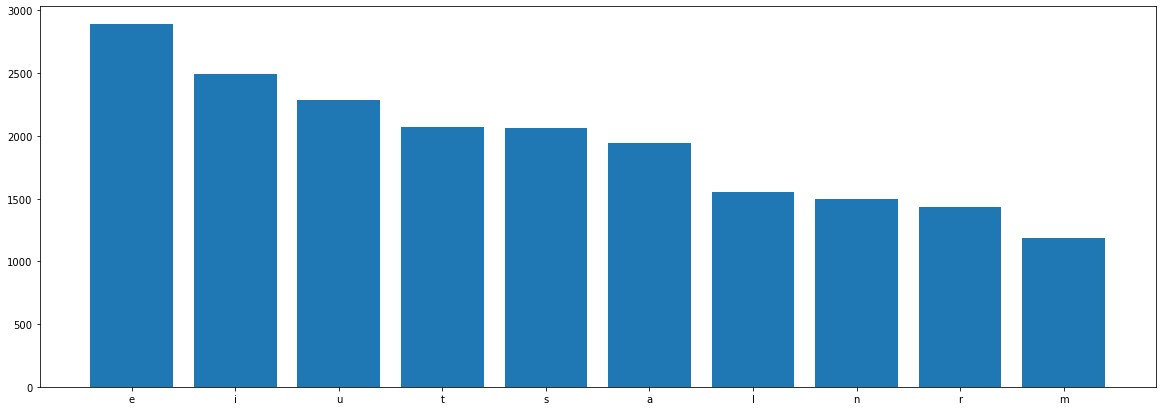

------------------------------
Total # of Words: 4518
------------------------------
WORD FREQUENCIES ARE SAVED!
------------------------------
WORD FREQUENCIES ARE SAVED  WITHOUT CASE SENSITIVITY!
------------------------------
TOP 10 WORDS & FREQUENCIES: 


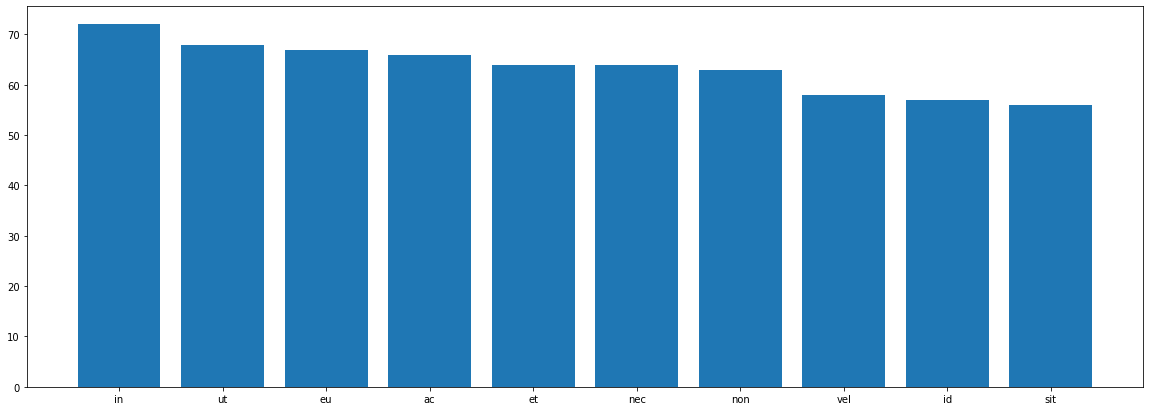

------------------------------
TOP 10 WORDS & FREQUENCIES WITHOUT CASE SENSITIVITY: 


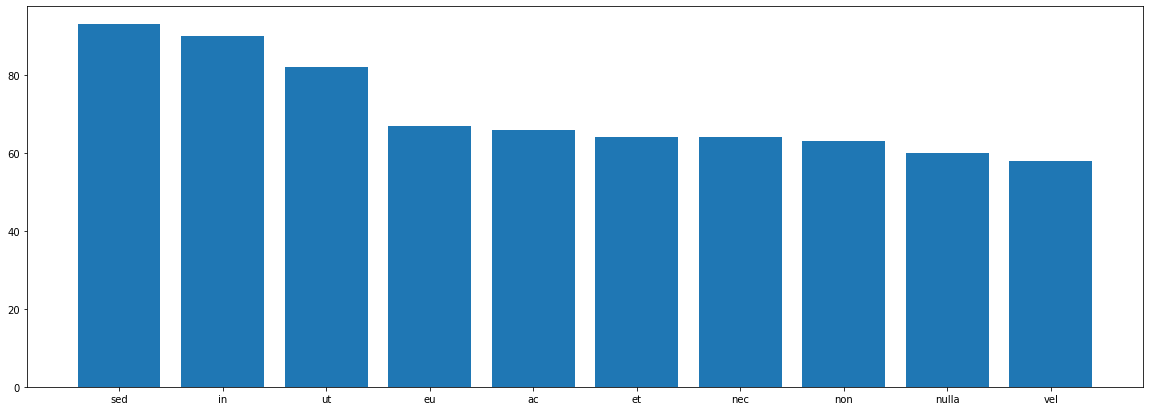

------------------------------
Longest Word Is: Pellentesque
------------------------------
Numbers Converted To Text: 
------------------------------
STOPWORDS ARE SAVED
------------------------------
TOP 10 WORDS & FREQUENCIES WITHOUT STOPWORDS: 


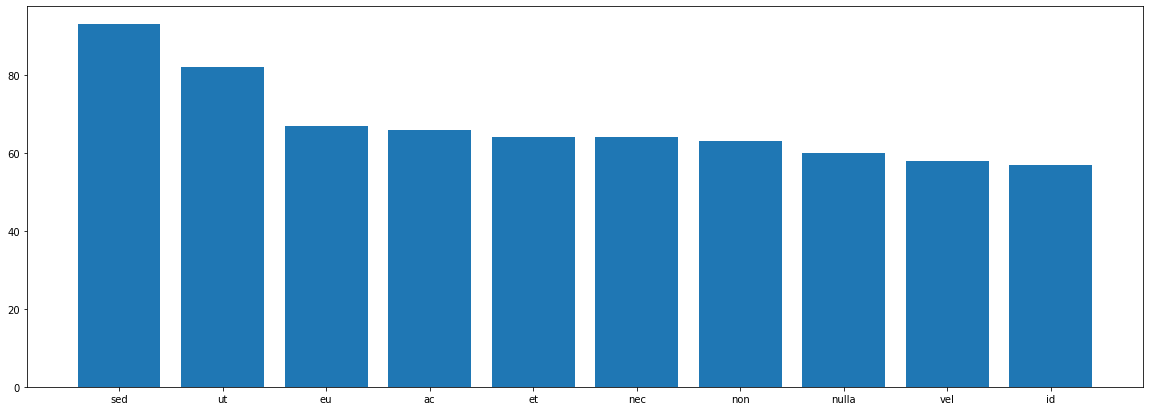

------------------------------
DEFINITIONS ARE SAVED!
------------------------------
TOTAL DEFINITIONS FOUND: 37
------------------------------
FREQUENCY OF 2 FRIEND WORDS IS SAVED!
------------------------------
FREQUENCY OF 2 FRIEND WORDS:


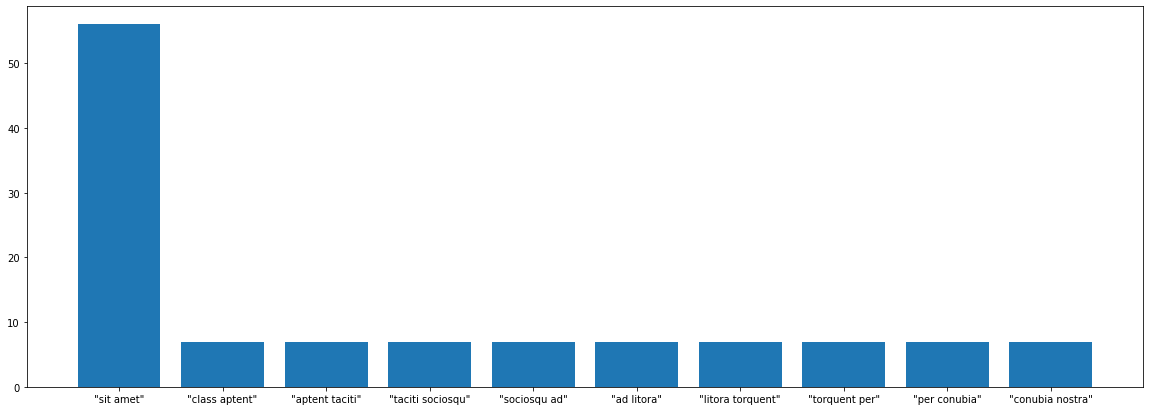

------------------------------


In [ ]:
#main
if __name__ == '__main__':
    whole_text = read_file()
    text_analysis(whole_text)
    number_of_lines()
    number_of_sentences(whole_text)
    number_of_paragraphs(whole_text)
    number_of_characters(whole_text)
    frequency_count(whole_text)
    number_to_string(whole_text)
    find_stopwords(whole_text)
    get_definitions(whole_text)
    get_friend_words(whole_text, 2)